Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

In [1]:
!pip install --upgrade seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


### Example Code

This is example code to get you started on Assignment 3. To get full credit for your analysis, you need to go significanly beyond what is given here (you can use the results below as a starting point, but these are just a superficial summary analysis). In particular, you need to evaluate the detectors using several of the metrics we discussed in class, making different groupings.

*We will not grade this file*, you need to submit the code you used in your report in a separate A3_code.ipynb file

In [7]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df_essay = pd.read_csv('A3CleanedEssayData.csv')
df_essay.columns

Index(['id', 'essay_prompt', 'authorship', 'class_type', 'grade_letter',
       'gptzero_label', 'gptzero_ai_percent', 'contentdetector_label',
       'contentdetector_ai_percent', 'sapling_fake_percent',
       'copyleaks_ai_percent'],
      dtype='object')

## Number of essays by Written By type

In [10]:
df_essay.groupby("authorship").id.count()

authorship
AI-generated                                      108
Entirely written by me                            115
Partly written by me, partly by AI                 52
Written by me, but grammar was corrected by AI     34
Name: id, dtype: int64

## Cross table of Essays by written by type and GPTZero Prediction
(This has the FP/FN values)

In [11]:

pd.pivot_table(data=df_essay,index='authorship',columns=['gptzero_label'],values='id',aggfunc='count')


gptzero_label,AI,Human,Mixed
authorship,,,
AI-generated,85,10,13
Entirely written by me,4,104,7
"Partly written by me, partly by AI",16,22,14
"Written by me, but grammar was corrected by AI",3,28,3


## Cross table of Essays by written by type and ContentDetectorAI Prediction
(This has the FP/FN values)

In [12]:
pd.pivot_table(data=df_essay,index='authorship',columns=['contentdetector_label'],values='id',aggfunc='count')


contentdetector_label,Likely AI,Likely Human,Likely Human with AI,May Have AI
authorship,,,,
AI-generated,41,37,10,20
Entirely written by me,13,79,14,9
"Partly written by me, partly by AI",12,21,8,11
"Written by me, but grammar was corrected by AI",5,17,2,10


## Average score by type

In [13]:
pd.pivot_table(data=df_essay,index='authorship',values=['gptzero_ai_percent','contentdetector_ai_percent', 'sapling_fake_percent', 'copyleaks_ai_percent'],aggfunc='mean')


,contentdetector_ai_percent,copyleaks_ai_percent,gptzero_ai_percent,sapling_fake_percent
authorship,,,,
AI-generated,57.296296,89.787037,84.620370,92.925000
Entirely written by me,32.443478,12.317391,6.922348,37.853913
"Partly written by me, partly by AI",50.582692,52.242308,41.898077,68.328846
"Written by me, but grammar was corrected by AI",40.647059,45.111765,16.150882,45.264706


## Distributions of Scores over all essays

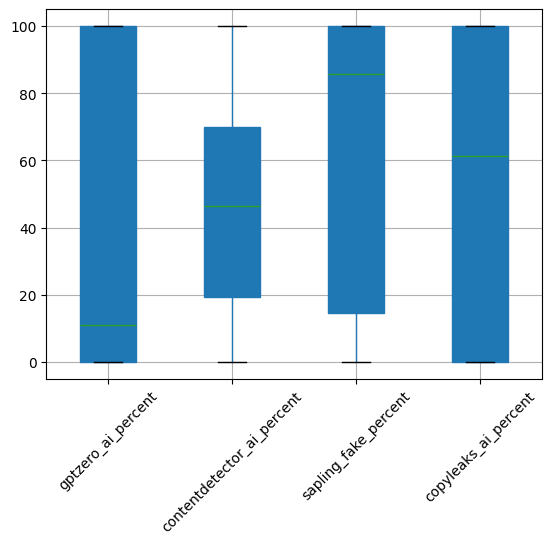

In [14]:
labels = ['GPTZero', 'ContentDetectorAI', 'Sapling', 'Copyleaks']

boxplot = df_essay.boxplot(column=['gptzero_ai_percent','contentdetector_ai_percent', 'sapling_fake_percent', 'copyleaks_ai_percent'],
                           vert=True,  # vertical box alignment
          patch_artist=True,  # fill with color
        rot=45)  # rotate labels)
plt.show()          

### Comparison of GPTZero Scores by Written type

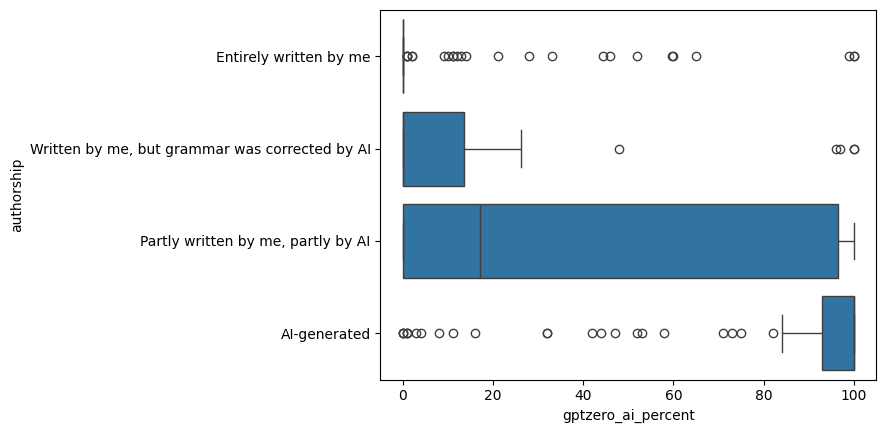

In [15]:
gptzero_boxplot = sns.boxplot(data=df_essay, x='gptzero_ai_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

### Comparison of ContentDetector Scores by Written type

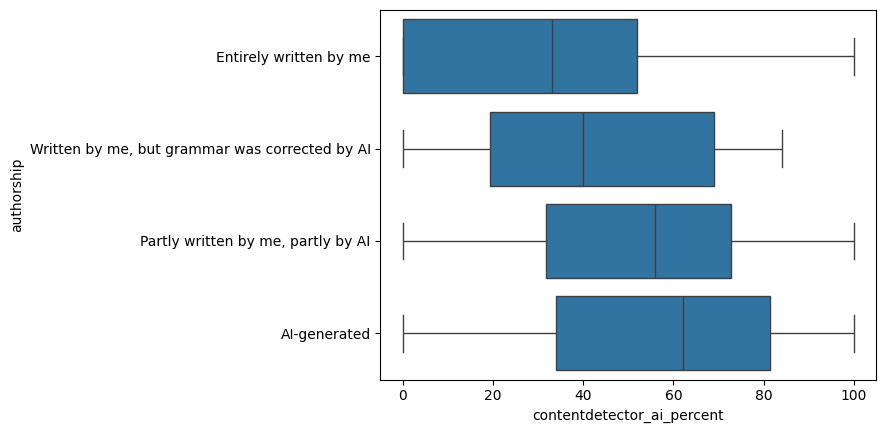

In [16]:
contentDetector_boxplot = sns.boxplot(data=df_essay, x='contentdetector_ai_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

### Comparison of  Sapling scores by Written type

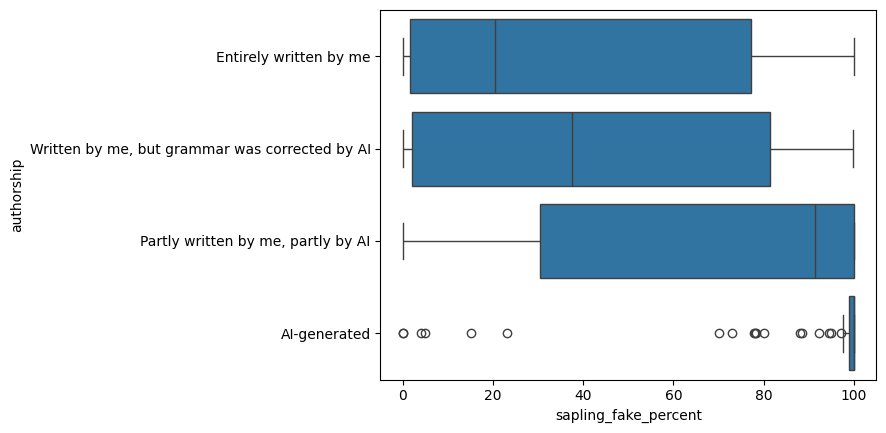

In [17]:
sapling_boxplot = sns.boxplot(data=df_essay, x='sapling_fake_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

### Comparison of Copyleak Scores by Written type

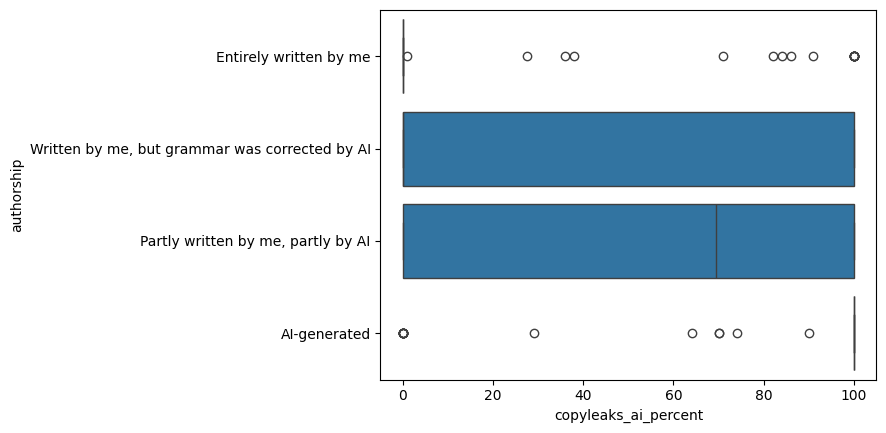

In [18]:
copyleaks_boxplot = sns.boxplot(data=df_essay, x='copyleaks_ai_percent',y='authorship',
                              order=['Entirely written by me', 'Written by me, but grammar was corrected by AI','Partly written by me, partly by AI', 'AI-generated'])
plt.show()

## Let's redo the error tables but based on values
using the recommended ranges for each tool
more: https://gptzero.me/news/ai-accuracy-benchmarking/

In [19]:
gpt_zero_bins = [-1, 50, 87, 100]
gpt_zero_labels=['0-50','50-87','87-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['gptzero_ai_percent'], bins=gpt_zero_bins, labels=gpt_zero_labels),values='id',aggfunc='count',observed=False)


gptzero_ai_percent,0-50,50-87,87-100
authorship,,,
AI-generated,16,8,84
Entirely written by me,108,4,3
"Partly written by me, partly by AI",31,3,18
"Written by me, but grammar was corrected by AI",30,0,4


In [20]:
contentdetectorai_bins = [-1, 50, 75, 100]
contentdetectorai_labels=['0-50','50-75','76-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['contentdetector_ai_percent'], bins=contentdetectorai_bins, labels=contentdetectorai_labels),values='id',aggfunc='count',observed=False)


contentdetector_ai_percent,0-50,50-75,76-100
authorship,,,
AI-generated,38,31,39
Entirely written by me,85,19,11
"Partly written by me, partly by AI",23,19,10
"Written by me, but grammar was corrected by AI",21,11,2


In [21]:
sapling_bins = [-1, 50, 87, 100]
sapling_labels=['0-50','50-87','87-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['sapling_fake_percent'], bins=sapling_bins, labels=sapling_labels),values='id',aggfunc='count',observed=False)


sapling_fake_percent,0-50,50-87,87-100
authorship,,,
AI-generated,6,6,96
Entirely written by me,73,19,23
"Partly written by me, partly by AI",16,9,27
"Written by me, but grammar was corrected by AI",18,9,7


In [22]:
copyleaks_bins = [-1, 50, 85, 100]
copyleaks_labels=['0-50','50-84','85-100']

pd.pivot_table(data=df_essay,index='authorship',columns=pd.cut(df_essay['copyleaks_ai_percent'], bins=copyleaks_bins, labels=copyleaks_labels),values='id',aggfunc='count',observed=False)


copyleaks_ai_percent,0-50,50-84,85-100
authorship,,,
AI-generated,10,4,94
Entirely written by me,101,3,11
"Partly written by me, partly by AI",25,3,24
"Written by me, but grammar was corrected by AI",18,1,15
